###<center>Karthik Bangalore Mani</center>
###<center>A20344597</center>

# 1.Single Variate Regression

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as mpl
from sklearn.cross_validation import KFold 
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from collections import defaultdict
from sys import float_info

In [2]:
def load_dataset(filename):
    '''Load a Dataset'''
    return np.loadtxt(filename)

In [3]:
def plot_data(X_data,Y_data,plot_type='bo',X_name='X-axis',Y_name='Y-axis',multi_plot='N',X2_data='N',Y2_data='N',plot2_type='N'):
    '''Plot data on to screen'''
    fig = mpl.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(X_name)    
    ax.set_ylabel(Y_name)           
    ax.plot(X_data,Y_data,plot_type)
    if multi_plot == 'Y':        
        ax.plot(X2_data,Y2_data,plot2_type)
    mpl.show()

In [4]:
def plot_data_sets(file_list,plot_type,X_name='X-axis',Y_name='Y-axis'):
    '''Given a list of files file_list, plot the data points by calling plot_data'''
    for _file in file_list:
        data_matrix = load_dataset(_file)
        plot_data(data_matrix[:,0],data_matrix[:,1],plot_type,X_name,Y_name)        

## Let's Plot the datasets

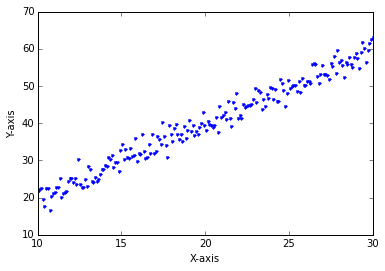

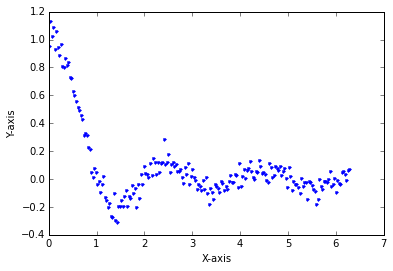

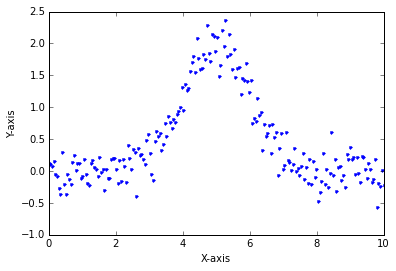

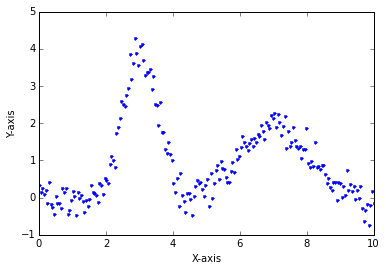

In [5]:
#Plot the synthetic datasets.
file_list = ['svar-set1.dat','svar-set2.dat','svar-set3.dat','svar-set4.dat']
plot_data_sets(file_list,'b.')

In [6]:
def get_split_index(percent,data_list):  
    '''The train and test data are segregated using the index returned by this function.
    Example : If a dataset has 200 rows, and percent is 80, returns 80% of 200 , which is 160.
    Now , Training dataset will 1-160 rows and Test datset will 160-200 rows.
    '''
    return int(len(data_list) * percent * 0.01)

In [7]:
def get_thetha_vector(data_matrix,split_percent=80):

    '''
    Computes the thetha vector as : 
    Theta =  inv(A).B,
    where B is the list of known labels,
          A is a matrix of : | m         Sigma(Xi)   |
                             |Sigma(Xi)  Sigma(Xi**2)|
          m is the number of training examples,
          X_i is the ith feature vector
    '''
    
    #will have to generalize this function
    split_index = get_split_index(split_percent,data_matrix)

    #Slice dataset and consider only 80 percent of it for training
    Train_set = data_matrix[:split_index]
    Test_set = data_matrix[split_index:]

    X_Train = Train_set[:,0]
    Y_Train = Train_set[:,1]

    #Let's compute theta.

    M = len(X_Train)

    sigma_Xi = sum(X_Train)
    sigma_Xi_square = sum(X_Train**2)

    sigma_Yi = sum(Y_Train)
    sigma_Yi_Xi = sum(Y_Train * X_Train) 
    
    #Compute A matrix
    
    A = np.array([[M,sigma_Xi],[sigma_Xi,sigma_Xi_square]])

    #Theta =  inv(A).B
    theta_vector = np.dot(np.linalg.inv(A),np.array([sigma_Yi,sigma_Yi_Xi]))

    return theta_vector

In [8]:
def get_predictions(X,theta_vec):
    '''Given a feature matrix X and a vector of thetas theta_vec,
       compute its prediction.
    '''
    prediction_list = []
    for ele in X[:,0]:
        pred = 0.0
        for i,theta in enumerate(theta_vec):
            pred += (theta * (ele ** i)) #Newly added        
        prediction_list.append(pred)             
        
    return prediction_list 

In [9]:
def plot_model(X,y_hat,print_label='N'):    
    ''' A custom function to plot the fitted models.
        Takes in X,y_hat and plots them onto a 2D space.
        If print_label is Y, plot predictions along with datset points,
           else just plot predictions
    '''
    if print_label=='N':#plot just prediction
        plot_data(X[:,0],y_hat,'r.','X-axis','Y-axis')    
    else:#plot prediction with known labels.
        plot_data(X[:,0],X[:,1],'b.','X-axis','Y-axis','Y',X[:,0],y_hat,'r.')        
        

###Fit first Dataset with Linear Model

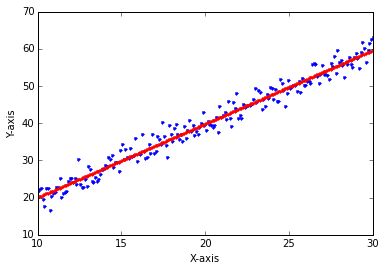

[ 0.3449032   1.97738003]


In [41]:

def plot_linear_model(_file):
    '''Plot a fitted Liner Model'''
    

    data_matrix = (load_dataset(_file))
    theta_vec = get_thetha_vector(data_matrix,split_percent=80)
    pred_list = get_predictions(data_matrix,theta_vec)    
    
    plot_model(data_matrix,pred_list,'Y')
    print theta_vec
plot_linear_model('svar-set1.dat')    

In [11]:
def get_rms_error(y_hat,y):
    '''
    Returns the Root Mean Square Eroor of y_hat and y.
    '''
    m = len(y)
    
    sigma = 0.0        
    for i in range(0,m):
        
        x = (((y_hat[i] - y[i])**2)*1.0)        
        x /= (y[i]**2)        
        
        sigma += x
        
    return sigma /m

In [12]:
'''Lets print training and testing errors.'''

def compute_train_test_erros(_file,split_percent=80):
    '''Train, split_percent percent of the data, and test on (100 - split_percent ) of the data.
       Return RMS values of Train and Test errors.       
    '''

    errors = []
    data_matrix = (load_dataset(_file))
    theta_vec = get_thetha_vector(data_matrix,split_percent)
    #predict on the training dataset
    pred_list = get_predictions(data_matrix,theta_vec)

    '''Segregate 80% of data and Train and test respectively'''
    #[START]
    split_index = get_split_index(split_percent,data_matrix)

    Train_set = data_matrix[:split_index]
    Test_set = data_matrix[split_index:]

    X_Train = Train_set[:,0]
    Y_Train = Train_set[:,1]

    X_Test = Test_set[:,0]
    Y_Test = Test_set[:,1]

    errors.append(get_rms_error(pred_list,Y_Train))
    print 'Linear Model Training error is :: ', errors[0]

    test_predictions = []

    for i in range(0, len(X_Test)):
        pred = theta_vec[0] + (theta_vec[1]*X_Test[i]) # will have to generalize this.
        test_predictions.append(pred)

    errors.append(get_rms_error(test_predictions,Y_Test))
    print 'Linear Model Testing  error is :: ', errors[1]
    #[END]
    
    return errors

compute_train_test_erros('svar-set1.dat',split_percent=80)

Linear Model Training error is ::  0.00360451045653
Linear Model Testing  error is ::  0.00391965983096


[0.0036045104565330813, 0.0039196598309607592]

In [13]:
def sk_learn_fit(_file,split_per=80):
    '''This is to compare our custom built Regressor to that of scikit learn's Regressor.
       Train a sk learn regressor and return its instance'''
    
    data_matrix = (load_dataset(_file))
    split_index = get_split_index(split_per,data_matrix)

    Train_set = data_matrix[:split_index]
    Test_set = data_matrix[split_index:]

    X_Train = Train_set[:,0]
    Y_Train = Train_set[:,1]

    X_Test = Test_set[:,0]
    Y_Test = Test_set[:,1]

    # Create linear regression object
    regr = linear_model.LinearRegression()


    # Train the model using the training sets
    regr.fit(np.swapaxes([X_Train],0,1), np.swapaxes([Y_Train],0,1))
    
    return [regr,X_Train,Y_Train,X_Test,Y_Test]

In [14]:
def print_sk_err():
    '''
    Now, let us compare the training and testing errors of our model and sk-learn's inbuilt functions.
    '''
    regressor_list = sk_learn_fit('svar-set1.dat',split_per=80)
    print 'sk-learn''s Training error' , get_rms_error(regressor_list[0].predict(np.swapaxes([regressor_list[1]],0,1)),regressor_list[2])
    print 'sk-learn''s Testing error' ,  get_rms_error(regressor_list[0].predict(np.swapaxes([regressor_list[3]],0,1)),regressor_list[4])

    '''Hence We have verified that our model''s and sk-learn''s Training and testing errors are same'''
    
print_sk_err()    

sk-learns Training error [ 0.00360451]
sk-learns Testing error [ 0.00391966]


###Let us fit polynomial models for the next 3 datasets


In [15]:
def build_Z_matrix(X,poly=2):
    '''
    Given a polynomial degree poly, build the Z-matrix and return it.
    '''  
    Z = []
    for x_i in X:
        z_i = []
        
        for deg in range(0,poly+1):
            z_i.append(x_i**deg)
            
        Z.append(z_i)
    
    return np.array(Z)

In [24]:
file_list = ['svar-set2.dat','svar-set3.dat','svar-set4.dat']

def get_best_poly_degree(file_list):    
    '''For all degrees in the range 2 to 8, perform 10-Fold cross validation, and return the RMS error for each
       degrees.
    '''
    for _file in file_list:
        print 'Data-Set :: ', _file
        print 'Error, Degree' 
        for pol_deg in range(2,9):    
            total_err = 0.0
            for fold in range(0,10):

                data_set = np.loadtxt(_file)

                np.random.shuffle(data_set)

                split_index = get_split_index(90,data_set)

                Train_set = data_set[:split_index]        
                Test_set = data_set[split_index:]        

                X_Train = Train_set[:,0]
                Y_Train = Train_set[:,1]

                X_Test = Test_set[:,0]
                Y_Test = Test_set[:,1]

                Z = build_Z_matrix(X_Train,pol_deg)

                thetas = np.dot(np.linalg.pinv(Z),Y_Train) 

                #Calculate error rate of mispredictions of Test data.        
                curr_deg_err = 0.0

                avg_y = 0.0
                for i,x in enumerate(X_Test):                            
                    avg_y += (Y_Test[i]**2)
                    y_hat = 0.0

                    for j,thetha in enumerate(thetas):                
                        y_hat += (thetha * (x**j))

                    curr_deg_err +=  ((y_hat - Y_Test[i])**2)

                total_err += curr_deg_err

            avg_y = float(avg_y) /(i+1)
            total_err = float(total_err)/avg_y

            avg_sos_error = total_err / 10
            var = avg_sos_error/ ((20-pol_deg-1)+1)

            print var, pol_deg    

get_best_poly_degree(file_list)            

Data-Set ::  svar-set2.dat
Error, Degree
0.638474768394 2
0.324950812911 3
0.0762051107816 4
0.200144282594 5
0.156979213539 6
0.15976929538 7
0.0762387361367 8
Data-Set ::  svar-set3.dat
Error, Degree
0.256380171521 2
0.399618159154 3
0.244034239074 4
0.185540017458 5
0.104395643698 6
0.151526618056 7
0.0900014751204 8
Data-Set ::  svar-set4.dat
Error, Degree
0.858954928198 2
0.57186854244 3
0.659567272367 4
0.531232478713 5
0.211650579811 6
0.284356753129 7
0.195243701898 8


#### As seen above, the datasets and their best best degree of polynomials are :
##### 1. svar-set2.dat : 8
##### 2. svar-set3.dat : 6
##### 3. svar-set4.dat : 8


## Fit Models for the Datasets

[ 0.26120329  1.98610257] svar-set1.dat


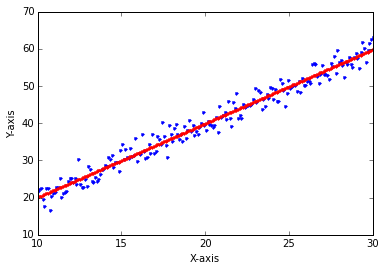

[  8.91700506e-01   2.29959588e+00  -9.78716952e+00   1.10430917e+01
  -5.97836005e+00   1.77747676e+00  -2.97140213e-01   2.62041644e-02
  -9.48726519e-04] svar-set2.dat


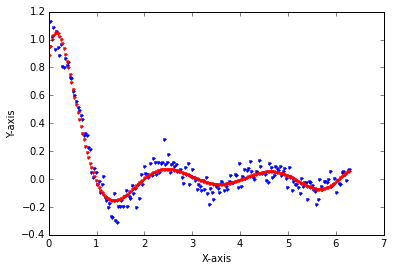

[ -3.38612474e-01   2.01456984e+00  -2.66391030e+00   1.29405906e+00
  -2.66026712e-01   2.42605377e-02  -8.13729024e-04] svar-set3.dat


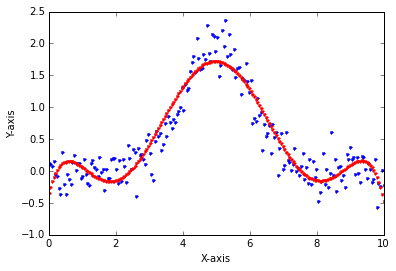

[ -5.59856523e-02   3.84188757e+00  -1.22744855e+01   1.23206342e+01
  -5.40239384e+00   1.21766630e+00  -1.47822306e-01   9.20058377e-03
  -2.30588252e-04] svar-set4.dat


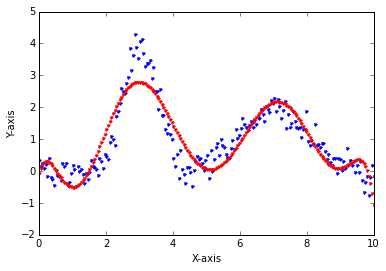

In [42]:
'''Now, let's fit a model with the identified degree of polynomials..'''

def plot_models(file_list,poly_deg,decrease_data=False):
    '''
    Plot the models and their respective datsets,using the polynomial order identified in the previous step.
    '''
    for i,_file in enumerate(file_list):
        data_matrix = (load_dataset(_file))
        if decrease_data == True:            
            Train_matrix = data_matrix[:len(data_matrix)-(0.95*len(data_matrix))]
            Z = build_Z_matrix(Train_matrix[:,0],poly_deg[i])
            thetas = np.dot(np.linalg.pinv(Z),Train_matrix[:,1])                        
        else:
            Z = build_Z_matrix(data_matrix[:,0],poly_deg[i])
            thetas = np.dot(np.linalg.pinv(Z),data_matrix[:,1])
        
        print thetas, _file
        
        pred_list = get_predictions(data_matrix,thetas)
        plot_model(data_matrix,pred_list,'Y')

plot_models(['svar-set1.dat','svar-set2.dat','svar-set3.dat','svar-set4.dat'],[1,8,6,8])        

### Now let's decrease the training data and observe the performance of models. It should be worse as expected

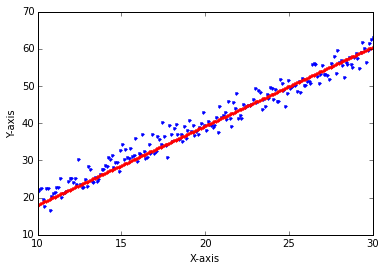

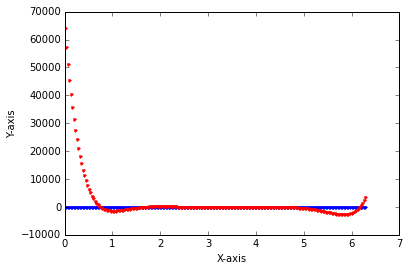

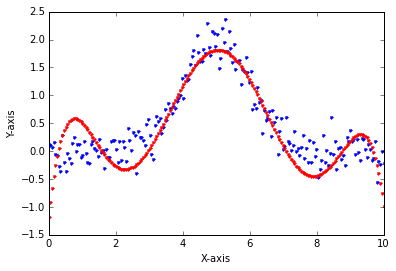

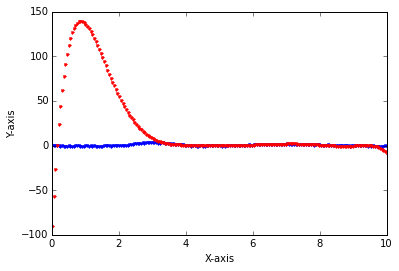

In [66]:
plot_models(['svar-set1.dat','svar-set2.dat','svar-set3.dat','svar-set4.dat'],[1,8,6,8],True)    

# 2. Multivariate Regression

   ##    Explicit Solution

In [25]:
'''data_set = load_dataset('mvar-set1.dat')
clf = linear_model.LinearRegression()
X = data_set[:,:2]
Y = data_set[:,2].reshape(2500,1)
clf.fit(X,Y)'''

"data_set = load_dataset('mvar-set1.dat')\nclf = linear_model.LinearRegression()\nX = data_set[:,:2]\nY = data_set[:,2].reshape(2500,1)\nclf.fit(X,Y)"

In [27]:
def K_fold(K,data_matrix,pol_deg=2):
    '''
    Perform K-Fold cross validation on a data_matrix, with an order pol_deg and return the RMS error .
    '''
    row_len = len(data_matrix[0])
    
    kf = KFold(len(data_matrix),K)
    
    total_rms_error = 0.0
    
    for tr_row_nums,tst_row_nums in kf:        
        
        X_train = []
        Y_train = []

        X_test = []
        Y_test = []
        
        for row in tr_row_nums:
            X_train.append(list(data_matrix[row][0:row_len-1]))
            Y_train.append([data_matrix[row][row_len-1]])
        
        for row in tst_row_nums:
            X_test.append(list(data_matrix[row][0:row_len-1]))
            Y_test.append([data_matrix[row][row_len-1]])
    
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)

        X_test = np.array(X_test)
        Y_test = np.array(Y_test)
        
        poly = PolynomialFeatures(pol_deg)
        Z = poly.fit_transform(X_train)
                
        
        thetas = np.dot(np.linalg.pinv(Z),Y_train)            
        
        #let's predict..
        Z_pr = poly.fit_transform(X_test)
        
        
        predictions = np.dot(np.transpose(thetas),np.transpose(Z_pr))
            
        total_rms_error += get_rms_error(predictions[0],Y_test)
    
    return total_rms_error

In [56]:
def multi_var_best_poly(data_set_list,max_order=10):
    
    '''
    Identify the best order of the polynomial by calling K_fold() function.
    The best order is the one that has the least RMS error.
    '''
    for data_set in data_set_list:
        print 'Processing - ', data_set,'\n'
        print 'Degree --> [RMS Error]'
        d_matrix = load_dataset(data_set)    
        deg_err = defaultdict(lambda : 0)
        for pol_deg in range(2,max_order):                  
            error = K_fold(10,d_matrix,pol_deg)
            deg_err[pol_deg] = error
            print pol_deg, '-->', error

        #Print the best degree of poly
        min_err = float_info.max
        best_deg = float_info.max
        
        for deg,err in deg_err.items():
            if err < min_err:
                min_err = err
                best_deg = deg
        print 'Therefore, the poly degree with least error is :',best_deg
        print '\n'

multi_var_best_poly(['mvar-set3.dat','mvar-set4.dat'],5)

Processing -  mvar-set3.dat 

Degree --> [RMS Error]
2 --> [ 29887.97639526]
3 --> [ 27071.0971735]
4 --> [ 30204.57531415]
Therefore, the poly degree with least error is : 3


Processing -  mvar-set4.dat 

Degree --> [RMS Error]
2 --> [ 7890162.15180832]
3 --> [ 8072458.32487905]
4 --> [ 28800061.89242591]
Therefore, the poly degree with least error is : 2




### Iterative Solution (Gradient Descent):

In [50]:
def gradient_J_Theta(Z_matrix,Theta_vec,Y,m):         
    '''Compute the Gradient of theta Vector and return it. 
       Gradient of J(Theta) = 2*Zt (Z.Theta - Y)'''
    return (2.0*np.dot(np.transpose(Z_matrix),(np.dot(Z_matrix,Theta_vec) - Y)))/m

In [51]:
def J_Theta(Z_matrix,Theta_vec,Y):
    '''Compute J_Theta, which the sum of square errors. 
    It is nothing but, (Z.Theta - Y)Transpose . (Z.Theta - Y)'''
    Z_Theta = np.dot(Z_matrix,Theta_vec) - Y    
    return np.dot(np.transpose(Z_Theta),Z_Theta)

In [52]:
def gradient_descent(file_name,num_iterations,lrn_rate=0.0001):
    '''
    Perform Gradient Descent iteratively, until J(theta) becomes minimum.    
    '''
    data_matrix = load_dataset(file_name)
    row_len = len(data_matrix[0])
    Z = data_matrix[:,:row_len-1]
    Y = data_matrix[:,row_len-1]
    theta_vec = np.zeros(len(Z[0]))

    iter_err = defaultdict(lambda : 0)
    
    for j in range(1,num_iterations+1):          
            
            old_theta_vec = theta_vec        
            theta_vec = theta_vec - (lrn_rate * gradient_J_Theta(Z,theta_vec,Y,len(Y)))                                
                        
            iter_err[j] = J_Theta(Z,theta_vec,Y)
    
    return [iter_err,theta_vec]

### Let's iterate 1000 times, with a learning rate of 0.0001

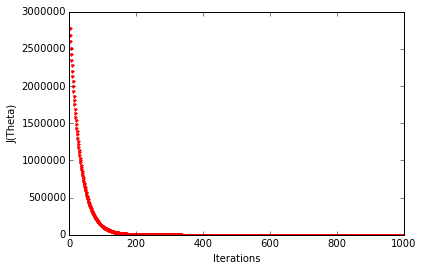

best theta is :  [ 4.73663699  3.99999972  3.26336244]


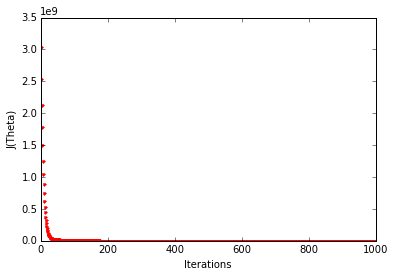

best theta is :  [ 4.99756564  2.00486872  3.00243436  5.99513128]


In [55]:
file_list = ['kar.txt','kar3.txt']
for _file in file_list :
    _list = gradient_descent(_file,1000,0.0001) 
    err_thetas = _list[0]
    plot_data(err_thetas.keys(),err_thetas.values(),plot_type='r.',X_name='Iterations',Y_name='J(Theta)')
    print 'best theta is : ',_list[1]            

####In the above plot, Gradient Descent seems to have converged since J(Thetha) has reached minimum after 1000 iterations